
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sklearn
from sklearn.datasets import load_boston
import ipywidgets as widgets
import numpy as np
from matplotlib import cm

# Estructura de un problema general de machine learning:
Los modelos de aprendizaje estadístico que pueden ser industriazados,   puede ser [esquematizado](https://proceedings.neurips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf) según se muestra en la siguiente imagen:

![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOP_General.png?raw=true)


![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOPS.png?raw=true)



A partir de ahora, nos concentraremos en entender los modelos de que ocurren dentro de la caja negra, y como encajan dentro de una estructura general de los modelos de machine learning ML.

De forma general un modelo de [ML](https://www.coursera.org/learn/machine-learning)   puede ser visualizado de la siguiente manera :

![SupervisedModel](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_GeneralTraining.png?raw=true)


[Machine Learning Engineering for Production (MLOps), Course 1](https://www.coursera.org/specializations/machine-learning-engineering-for-production-mlops)



## ¿Cual es el mejor enfoque para optimizar un problema?

[Non-Free-Lunch-Theorem](https://ieeexplore.ieee.org/document/585893):
Por cada par de algoritmos hay tantos problemas en el que el primer algoritmo es mejor que el segundo como problemas en el que el segundo es mejor que el primero, como consecuencia no existe un unico algoritmo inteligente para optimizar un problema, siempre es recomendable emplear un cierto conocimiento especifico de un problema.



##  Estructura general de los problemas ML:
1. Construir hipotesis.
2. Elegir parametros
3. Elegir la funcion de coste.
4. Minimizar los datos 
5. Validar y entrenar.



## Aprendizaje Supervisado :

- Datos etiquetados
- Retroalimentación directa
- Predicción de resultados.










En general, el modelo puede ser optmizado como sigue:

Dado un conjunto de caracteristicas $X_1, X_2,X_3, ...X_n$ podemos encontrar un valor $Y$, que puede ser optimado dado el siguiente modelo#

$Y = f(X) + \epsilon$





# Regresión lineal: Para un resumen del metodo ir al final de esta sesión. Resumen del metodo

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y         | X_1      |
|--------|----------|----------|
|1       |$Y^{1}$   | $X_1^{1}$|
|2       |$Y^{2}$   | $X_1^{2}$|
|.       |.         | .        |
|.|.         | .        |
|.|.         | .        |
|m|$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así: 

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes metodos el más conocido es el gradiente descendente. 

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)




### Ejemplo :
Supongamos que tenemos lo siguientes valores, asocaidas a un determinado sistema:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|



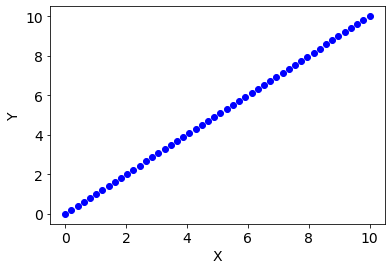

In [2]:
x = np.linspace(0, 10)
y = np.linspace(0, 10)
names_cols = ["X1","Y"]

df = pd.DataFrame({"X1":x,"Y":y})
plt.figure()
plt.plot(df.X1,df.Y,"bo")
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



Definamos nuestro modelo y la función de coste:

In [3]:
def H(X, θ0, θ1):  
  """
  Parameter:
    theta_0 = input parameter
    theta_1 = input parameter
    X = Caracteristicas
  Return 
    H value with model
  """
  return θ0 + θ1*X


def cost(X, Y, θ0, θ1):
  
    #m = len(Y)
    j = (H(X, θ0, θ1) - Y)**2
    J = j.mean()
    return J/(2)


Para $\theta_0 = 0 $ y diferentes valores de $\theta_1  $, determinemos la funcion de coste y las rectas que modelan nuestro sistema, así, tenemos que:



In [4]:
theta1 = np.linspace(-10, 12) 
J = np.zeros(len(theta1))

for i,t1 in enumerate(theta1):
    J[i] = cost(df.X1.values, df.Y.values, 0, t1)
    i =i + 1


In [5]:
@widgets.interact
def graph_values(theta_eval = np.array([-10, -5, -1, 0, 1, 5, 10])):
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    plt.plot(df.X1,df.Y,"bo")
    plt.plot(df.X1, H(df.X1, 0, theta_eval )  ,"r-", label = f"θ0 = 0, θ1 = {theta_eval}")
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlim( 0, 10)
    plt.ylim(-10, 10)
    plt.xlabel("X", fontsize=14)
    plt.ylabel("Y", fontsize=14)
    plt.legend()

    plt.subplot(122)
    plt.plot(theta1, J)
    plt.plot(theta_eval, cost(df.X1, df.Y,0, theta_eval), "or",label = f"θ0 = 0, θ1 = {theta_eval}")
    plt.xlabel("$\\theta_1$", fontsize=14)
    plt.ylabel("$J(\\theta_0 = 0, \\theta_1)$", fontsize=14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlim( -10, 12)
    plt.ylim( 0 , 2000)
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='theta_eval', options=(-10, -5, -1, 0, 1, 5, 10), value=-10), Outpu…

In [6]:
# Construir la superficie para theta0, theta_1

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np



In [8]:
# Construyendo el grid()
N1 = 100
N2 = 100
theta0 = np.linspace(-0.5, 0.5, N1)
theta1 = np.linspace(-2.0, 3.0, N2)
t0, t1 = np.meshgrid(theta0, theta1) #Empleando un meshgrid


J = np.zeros((N1, N2)) #Evaluando los valores de la funcion de coste para el meshgrid considerado
for i,t_0 in enumerate(theta0):
  for j,t_1 in enumerate(theta1):
    J[i,j] = cost( df.X1, df.Y, t_0, t_1)
#J=J/np.max(J)

C:\Users\salin\AppData\Local\Temp\ipykernel_16744\3914306289.py:4: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(t0, t1, J, 20, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
C:\Users\salin\AppData\Local\Temp\ipykernel_16744\3914306289.py:5: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(t0, t1, J, 20, lw=3, colors="k", linestyles="solid")


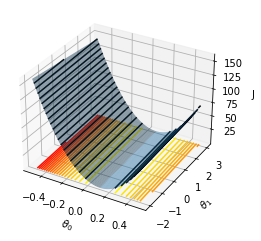

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(t0, t1, J,  rstride=1, cstride=1, alpha=0.5)
ax.contour(t0, t1, J, 20, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(t0, t1, J, 20, lw=3, colors="k", linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
#ax.set_zlim(0, 30)
plt.show()



# Otra forma de verlo

In [10]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

# Datos sinteticos para entender mejor la regresion lineal

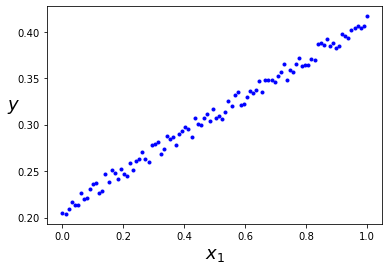

In [11]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.ylim(100, 1000)
#plt.xlim(0, 3000)
plt.show()

\begin{equation}
h(X) =\theta_0 + \theta_1 X
\end{equation}

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}


In [12]:
@widgets.interact
def graph_values(theta_eval = np.linspace(0, 0.5, 10)):
  plt.figure(figsize=(14, 6))
  plt.subplot(121)
  plt.plot(X,y,"bo")
  plt.plot(X, H(X, 0.2, theta_eval )  ,"r-", label = f"θ0 = 200, θ1 = {theta_eval}")
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  #plt.xlim( 0, 10)
  #plt.ylim(-10, 10)
  plt.xlabel("X", fontsize=14)
  plt.ylabel("Y", fontsize=14)
  plt.legend()

  

interactive(children=(Dropdown(description='theta_eval', options=(0.0, 0.05555555555555555, 0.1111111111111111…

In [13]:
# Construyendo el grid()
N1 = 400
N2 = 400
theta0 = np.linspace(-1, 1, N1)  #Intercepto
theta1 = np.linspace(-0.8, 0.8, N2)   #pendiente
t0, t1 = np.meshgrid(theta0, theta1) #Empleando un meshgrid

J = np.zeros((N1, N2)) #Evaluando los valores de la funcion de coste para el meshgrid considerado

for i,t_0 in enumerate(theta0):
  for j,t_1 in enumerate(theta1):
    J[i,j] = cost( X, y, t_0, t_1)

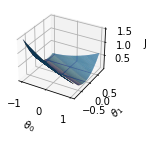

In [14]:
fig = plt.figure()
ax = fig.add_subplot(211, projection="3d")
ax.plot_surface(t0,t1,J,  rstride=1, cstride=1)
#ax.contour(t0, t1, J, 50,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
#ax.set_zlim(0, 30)
plt.show()




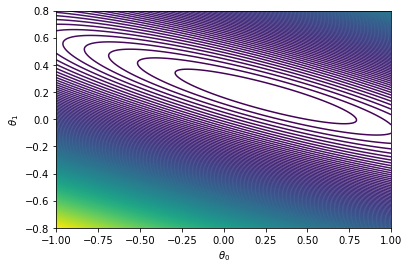

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(t0, t1,J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
#ax.set_xlim(-0,700)
#ax.set_ylim(-0.6,0.6)
plt.show()



En sintesis, lo que se busca es el minimo de la hypersuperficie asociada a la función de coste. Veamoslo con una superficie diferente:



C:\Users\salin\AppData\Local\Temp\ipykernel_16744\1936871115.py:8: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(X1, X2, Y, 20, lw=3,  linestyles="solid", offset=-1)


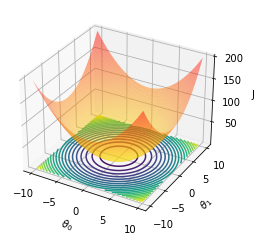

In [16]:
x1=np.linspace(-10,10,100 )
X1,X2 = np.meshgrid(x1,x1)
Y = X1**2 + X2**2

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X2, Y,  cmap="autumn_r",rstride=1, cstride=1, alpha=0.5)
ax.contour(X1, X2, Y, 20, lw=3,  linestyles="solid", offset=-1)
#ax.contour(t0, t1, J, 20, lw=3, colors="k", linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
#ax.set_zlim(0, 30)
plt.show()

# Gradiente Descendente

Sea $f(\omega) = (\omega-1)^2$ , con $\omega \in \mathbb{R} $. El minimo de esta función esta determinado por#
\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}\omega} = 0
\end{equation}

\begin{equation}
\omega = 1
\end{equation}


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
1. Proponer un número aleatorios inicial $\omega_i$
2. Para descender al mínimo de la función, encontremos un  valor para el cual 
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo. 

3. Evaluar $f(\omega_{i+1})$

4. Iterar hasta encontrar el minimo de la función 


En el caso de la funcion propuesta, asumiendo un valor de $\alpha=1$, tenemos que:

1. Supongamos que $\omega_{0} = 2$, luego :
2. $\omega_{0+1} = 2 - 1 f'(\omega_{0}) =  = 0$
3. $f(0) = 1$
4. $\omega_{1+1} = 0 - 1 f'(\omega_{1}) = 0-1(2(0-1)) =  2$

El valor del $\omega$  despues de un par de iteraciones, no es el esperado, por que no minimiza la función, se debe proponer un tasa de aprendizaje  **$\alpha$** de tal forma que permita descender suavemente para encontrar el minimo. 


In [17]:
f = lambda omega: (omega**2 - 1)
fp = lambda omega: 2*(omega - 1)

def gradD(omega_,alpha, fp):
  """
  Gradiente descendente
  """
  return omega_ - alpha*fp(omega_)

In [18]:
# Determinacion del gradiente descendente
omegai = 2
alpha = 0.7
OM = []
def gradient_iteration(alpha, omegai): 
  OM = []
  for i in range(0,20):  
    omega = gradD(omegai, alpha , fp)
    omegai = omega  
    OM.append(omegai)
    if( abs(fp(omegai))< 1E-4):
      print(f"El valor minimo es {omegai:.4f} despues de {i} iteraciones")
      break
#    print(f"omega = {omegai:.4f}\t f(omega) = {f(omegai):.4f}\t fp(omega) = {f(omegai):.4f}")
  
  return OM

In [19]:

@widgets.interact
def graph_descent(OM = gradient_iteration(alpha = 0.1, omegai = 2)): 
  omega = np.linspace(-10, 10, 100)
  fig = plt.figure(figsize=(10,4))
  ax = fig.add_subplot(121)
  ax.plot(omega, f(omega))
  ax.plot(OM, f(OM),"ro-", label=f" fp(omega)={f(OM):.4f}")
  plt.legend()

interactive(children=(Dropdown(description='OM', options=(1.8, 1.6400000000000001, 1.512, 1.4096, 1.32768, 1.2…


Cuando se tiene más dimensiones, el gradiente descendente puede ser escrito como sigue:  Sea $ J(\theta_1, \theta_2) $ una función continua, nuestro objetivo es encontrar el mínimo de la función, a través del gradiente descendente, sea $\vec{\Theta} = (\theta_0, \theta_1)$


\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\theta_0, \theta_1)
\end{equation}

en componentes:

\begin{equation}
\Delta \theta_{0} =  - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\Delta \theta_{1} =  - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}


La componente j-esima será:
\begin{equation}
\theta_{j} := \theta_{j} - \alpha \frac{\partial J}{\partial \theta_j}
\end{equation}






¿Cómo puede encontrar el minimo el gradiente descente en 2D?. Intuición gráfica 


C:\Users\salin\AppData\Local\Temp\ipykernel_16744\2696260553.py:11: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(X, Y, Z, 20, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
C:\Users\salin\AppData\Local\Temp\ipykernel_16744\2696260553.py:16: UserWarning: The following kwargs were not used by contour: 'lw', 'offset'
  ax2.contour(X, Y, Z, 30, lw = 3, linestyles="-", offset=-1)
C:\Users\salin\AppData\Local\Temp\ipykernel_16744\2696260553.py:17: UserWarning: The following kwargs were not used by contour: 'lw', 'c'
  c=ax2.contourf(X, Y, Z, 30, lw=3,c="white")


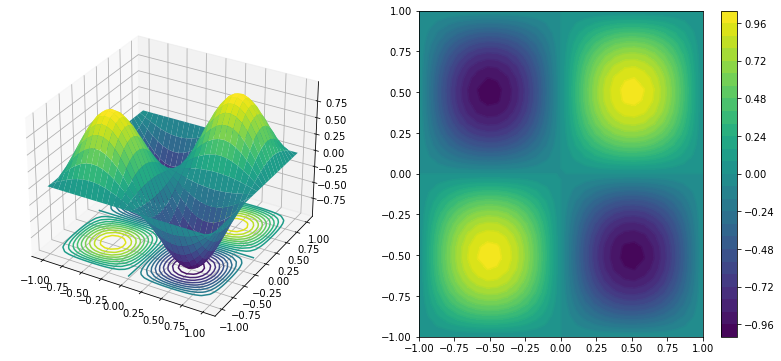

In [20]:
#Ref=https://stackoverflow.com/questions/35445424/surface-and-3d-contour-in-matplotlib
#Change the color
#Ref:https://matplotlib.org/stable/tutorials/colors/colormaps.html

X, Y = np.mgrid[-1:1:30j, -1:1:30j]
Z = np.sin(np.pi*X) * np.sin(np.pi*(Y))

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection="3d")
c=ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.contour(X, Y, Z, 20, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
#fig.colorbar(c)
#ax.contour(X, Y, Z, 10, lw=3, cmap=cm.coolwarm, colors="k", linestyles="solid")

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, 30, lw = 3, linestyles="-", offset=-1)
c=ax2.contourf(X, Y, Z, 30, lw=3,c="white")
fig.colorbar(c,)

#ax2.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.show()



Tarea 4.1 
[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg) 

Encontrar el minimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:

\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

1. Para ello realice una gráfica de la función en 3D, y un mapa de contourno de la función.
2. Determine el valor mínimo de la funcion con el metodo del gradiente descendente.


In [21]:
x=np.linspace(-1.5, 2.0, 200)
y=np.linspace(-1.5, 2.0, 200)
X, Y=np.meshgrid(x, y)
F = lambda x, y: (np.sin(0.5*x**2-0.25*y**2+3))*(np.cos(2*x+1-np.exp(y)))
Z = F(X,Y)

C:\Users\salin\AppData\Local\Temp\ipykernel_16744\3324126806.py:4: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(X, Y, Z, 40, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
C:\Users\salin\AppData\Local\Temp\ipykernel_16744\3324126806.py:11: UserWarning: The following kwargs were not used by contour: 'lw', 'offset'
  ax2.contour(X, Y, Z, 30, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
C:\Users\salin\AppData\Local\Temp\ipykernel_16744\3324126806.py:12: UserWarning: The following kwargs were not used by contour: 'lw'
  c=ax2.contourf(X, Y, Z, 30, lw=3,cmap=cm.viridis)


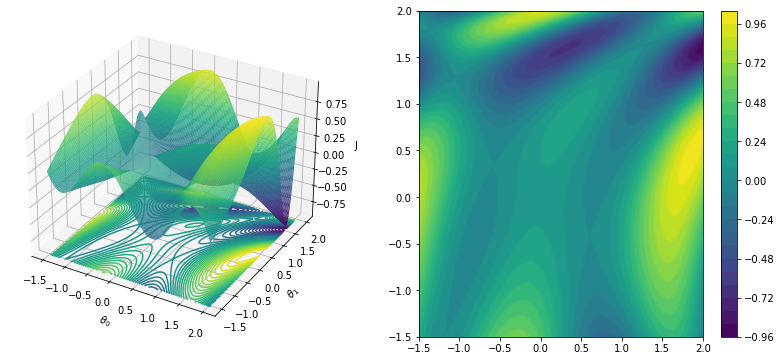

In [22]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(X, Y, Z, cmap=cm.viridis, rstride=1, cstride=1, alpha=1)
ax.contour(X, Y, Z, 40, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
#ax.set_zlim(0, 30)

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, 30, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
c=ax2.contourf(X, Y, Z, 30, lw=3,cmap=cm.viridis)
fig.colorbar(c,)

plt.show()

# Gradiente descendente para la función de coste

Proponiendo un modelo lineal, tenemos que:
\begin{equation}
h(X) = (\theta_0 + \theta_1 X)
\end{equation}



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}

Asumiento una metrica  euclidiana, tenemos que:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=1}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}

Las derivadas de la funcion de cote vienen dadas por :

\begin{equation}
\frac{\partial J}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^{m}(h(X^{(i)})-y^{(i)})
\end{equation}

\begin{equation}
\frac{\partial J}{\partial \theta_1} = \frac{1}{m}\sum_{i=1}^{m}(h(X^{(i)})-y^{(i)})X^{(i)}
\end{equation}


El gradiente descente viene dado por :

\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}



# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machining learning puede ser estructurado como sigue:


1. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta) 
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


2. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


3. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

# Tarea 4.2: 

De igual forma que con los sistemas metricos, la funcion de coste puede ser generalizada para otro tipo de metricas, de forma análoga a lo que ocurre con la distancia entre dos puntos. Sabemos que la metrica euclidiana puede ser escrita como:

\begin{equation}
d = \left[ \sum_{i=1}^{D}  (x_i-x_i')^2 \right]^{1/2}  (1)
\end{equation}

donde D es la dimension del espacio, así :

- Para una dimensión tenemos que D = 1:

\begin{equation}
d = |x_i-x_i'|
\end{equation}

- Para una dimensión tenemos que D = 2:
\begin{equation}
d = \left[ (x_1-x_1')^2 + (x_2-x_2')^2 \right]^{1/2} 
\end{equation}

- Para una dimensión tenemos que D = 3:
\begin{equation}
d = \left[ (x_1-x_1')^2 + (x_2-x_2')^2 + (x_3-x_3')^2 \right]^{1/2} 
\end{equation}


La metrica anterior puede ser generalizada como sigue, 

\begin{equation}
d = \left[ \sum_{i=1}^{D}  (x_i-x_i')^p \right]^{1/p} 
\end{equation}

Para n=2 tenemos que la metrica  de la ecuación (1).



Análogo a lo anterior, la funcion de coste puede emplear cualquiera de las metricas descritas dependiendo de la dimension o caracteristicas asociadas al sistema de estudio, para datos de una sola caracteristica la función de coste puede ser escrita como sigue:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{pm} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^p
\end{equation}





Empleando los siguientes datos determine:

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

Determine los valores mínimos de $\theta_0$, $\theta_1$ para los siguientes casos:
 

 1. Emplea la metrica ecuclidiana con p = 2 compare su resultado con los valores empleando la libreria sklearn:[Linear Regresion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

 2. Emple p = 1, p = 3. ¿Como varian los resultaodos en este caso?
 3. Construya las curvas de aprendizaje  para función del número  de datos para las situaciones descritas, ¿qué peude concluir?